# Iris flower Classification Module

# Process Step

1. Import Dataset
2. Visual Dataset
3. Data Prepation
4. Training the Module
5. Prediction
6. Model Evaluation

# Import Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
#Importing DataSet from local device
a=pd.read_csv('D:\Intern Work\LetsGrowMore\Iris classification\DataSet\iris.csv')
a

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.5,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Print first 25 dataset
a.head(25)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.5,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Print detail info of Dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
a.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
a.shape

(150, 6)

In [7]:
#Print the Null values in Dataset
a.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Grouping the records by Species
b=a.groupby('Species')
b.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.5,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [9]:
#Finding the Differnt Species Type
a['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visual Dataset

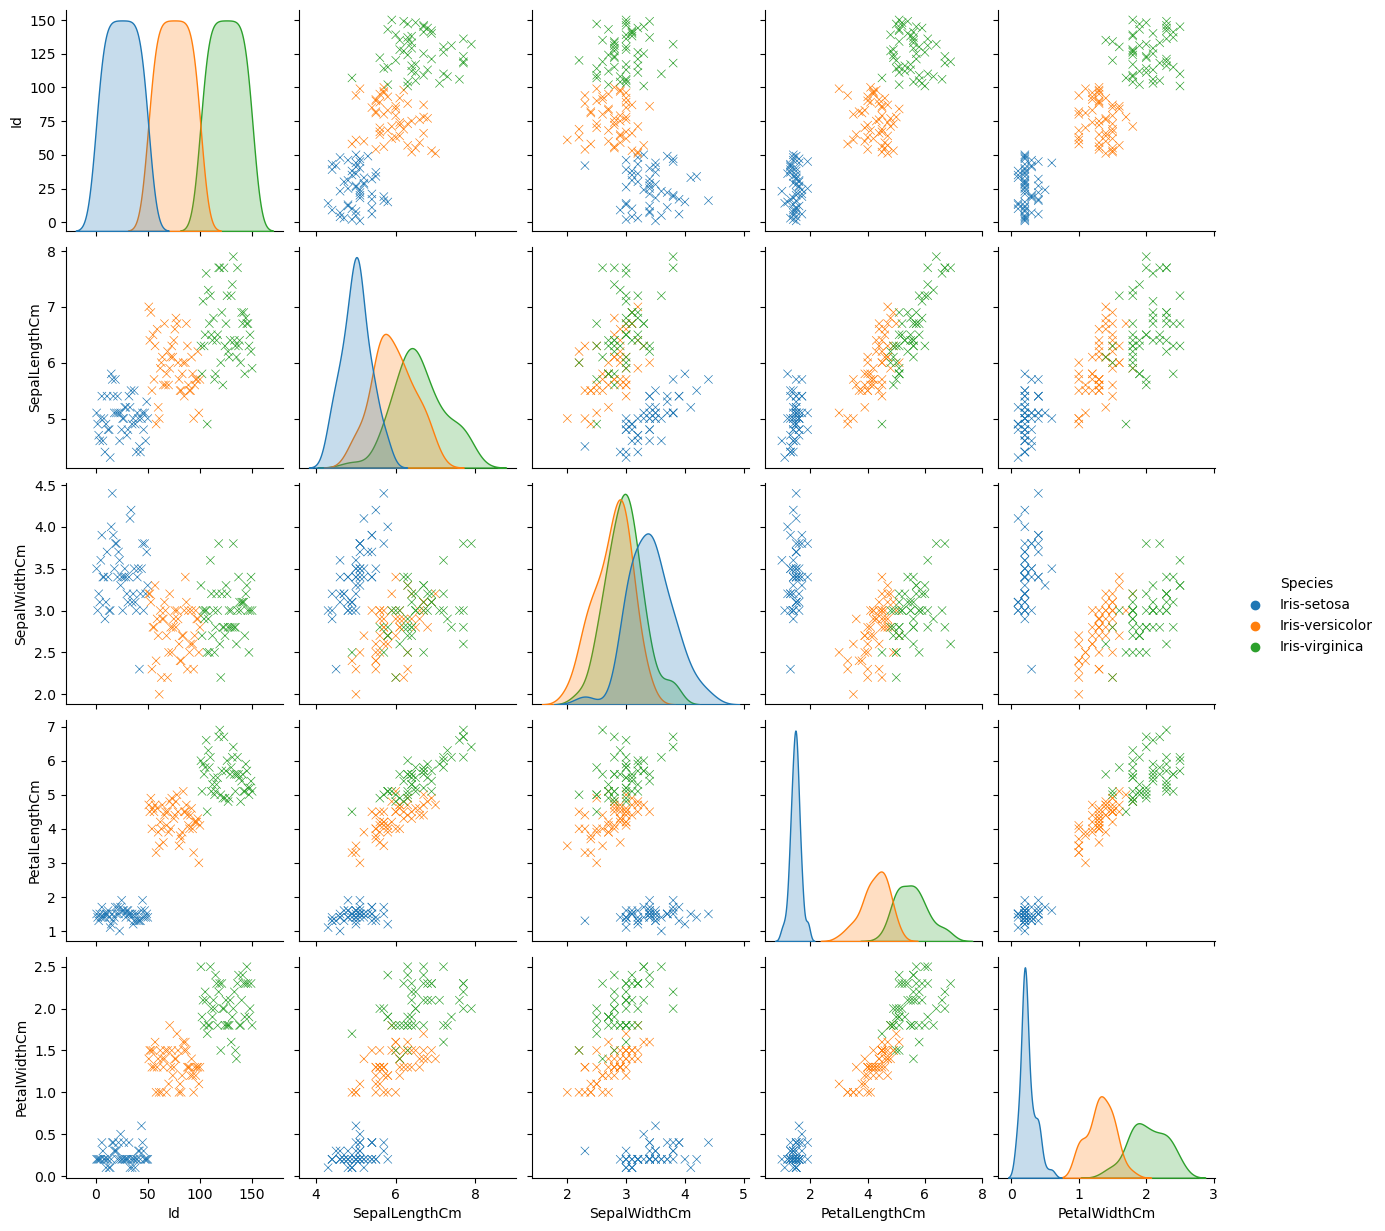

In [10]:
#PairPlot using Seaborn
sns.pairplot(a,hue="Species",markers="x")

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

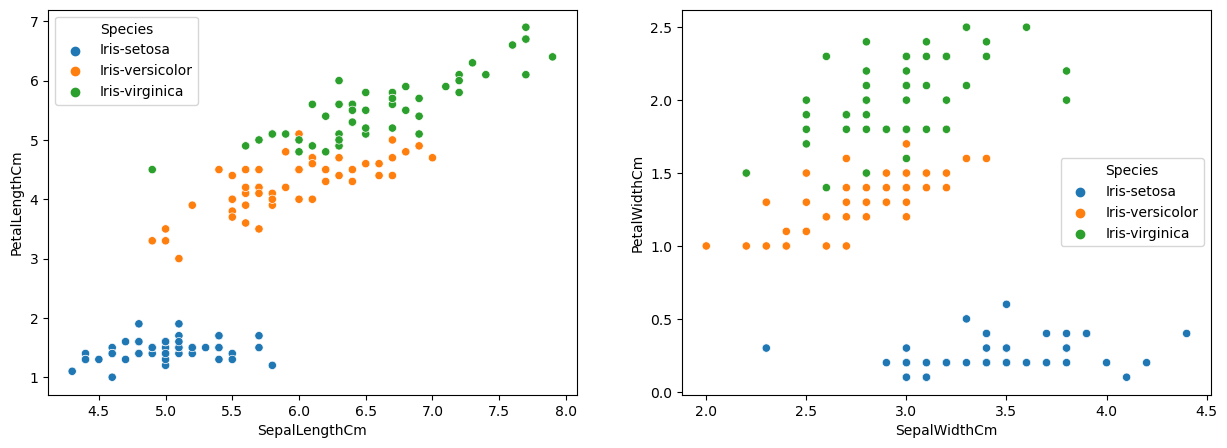

In [11]:
#ScatterPlot Diagram
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=a,hue="Species")

plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=a,hue="Species")

Text(0, 0.5, '')

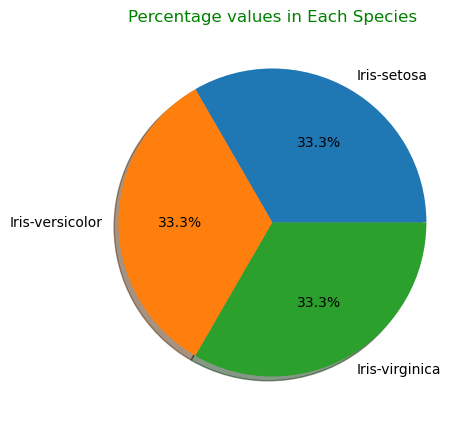

In [12]:
#PieChart Diagram
a['Species'].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,figsize=(5,5))
plt.title("Percentage values in Each Species",fontsize=12,c="g")
plt.ylabel("",fontsize=15,c="r")

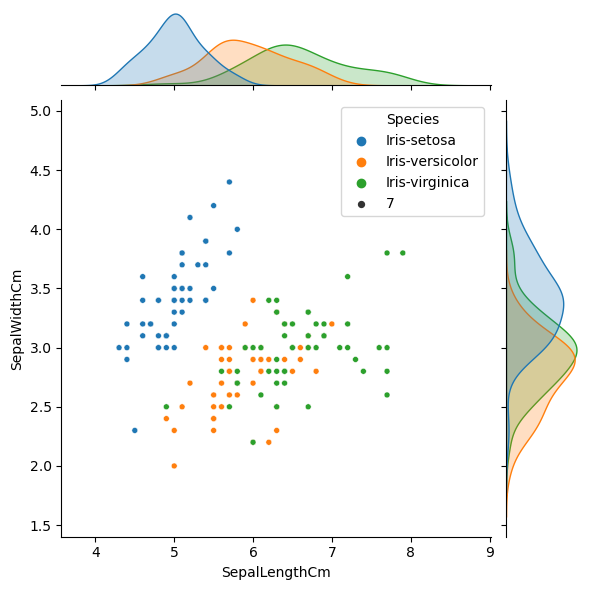

In [13]:
#JointPlot Diagram for SepalLengthCm vs SepalWidthCm
sns.jointplot(data=a,x="SepalLengthCm",y="SepalWidthCm",size=7,hue="Species")

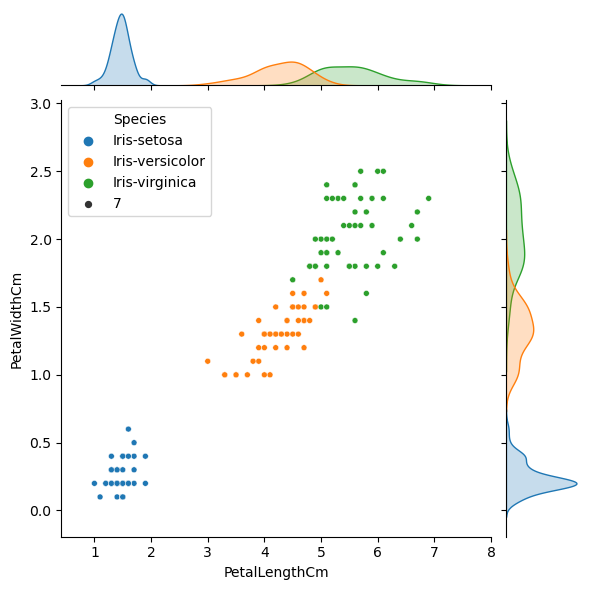

In [14]:
#JointPlot Diagram for PetalLengthCm vs PetalWidthCm
sns.jointplot(data=a,x="PetalLengthCm",y="PetalWidthCm",size=7,hue="Species")

Text(0.5, 1.0, 'Bar plot Species Vs PetalWidthCm')

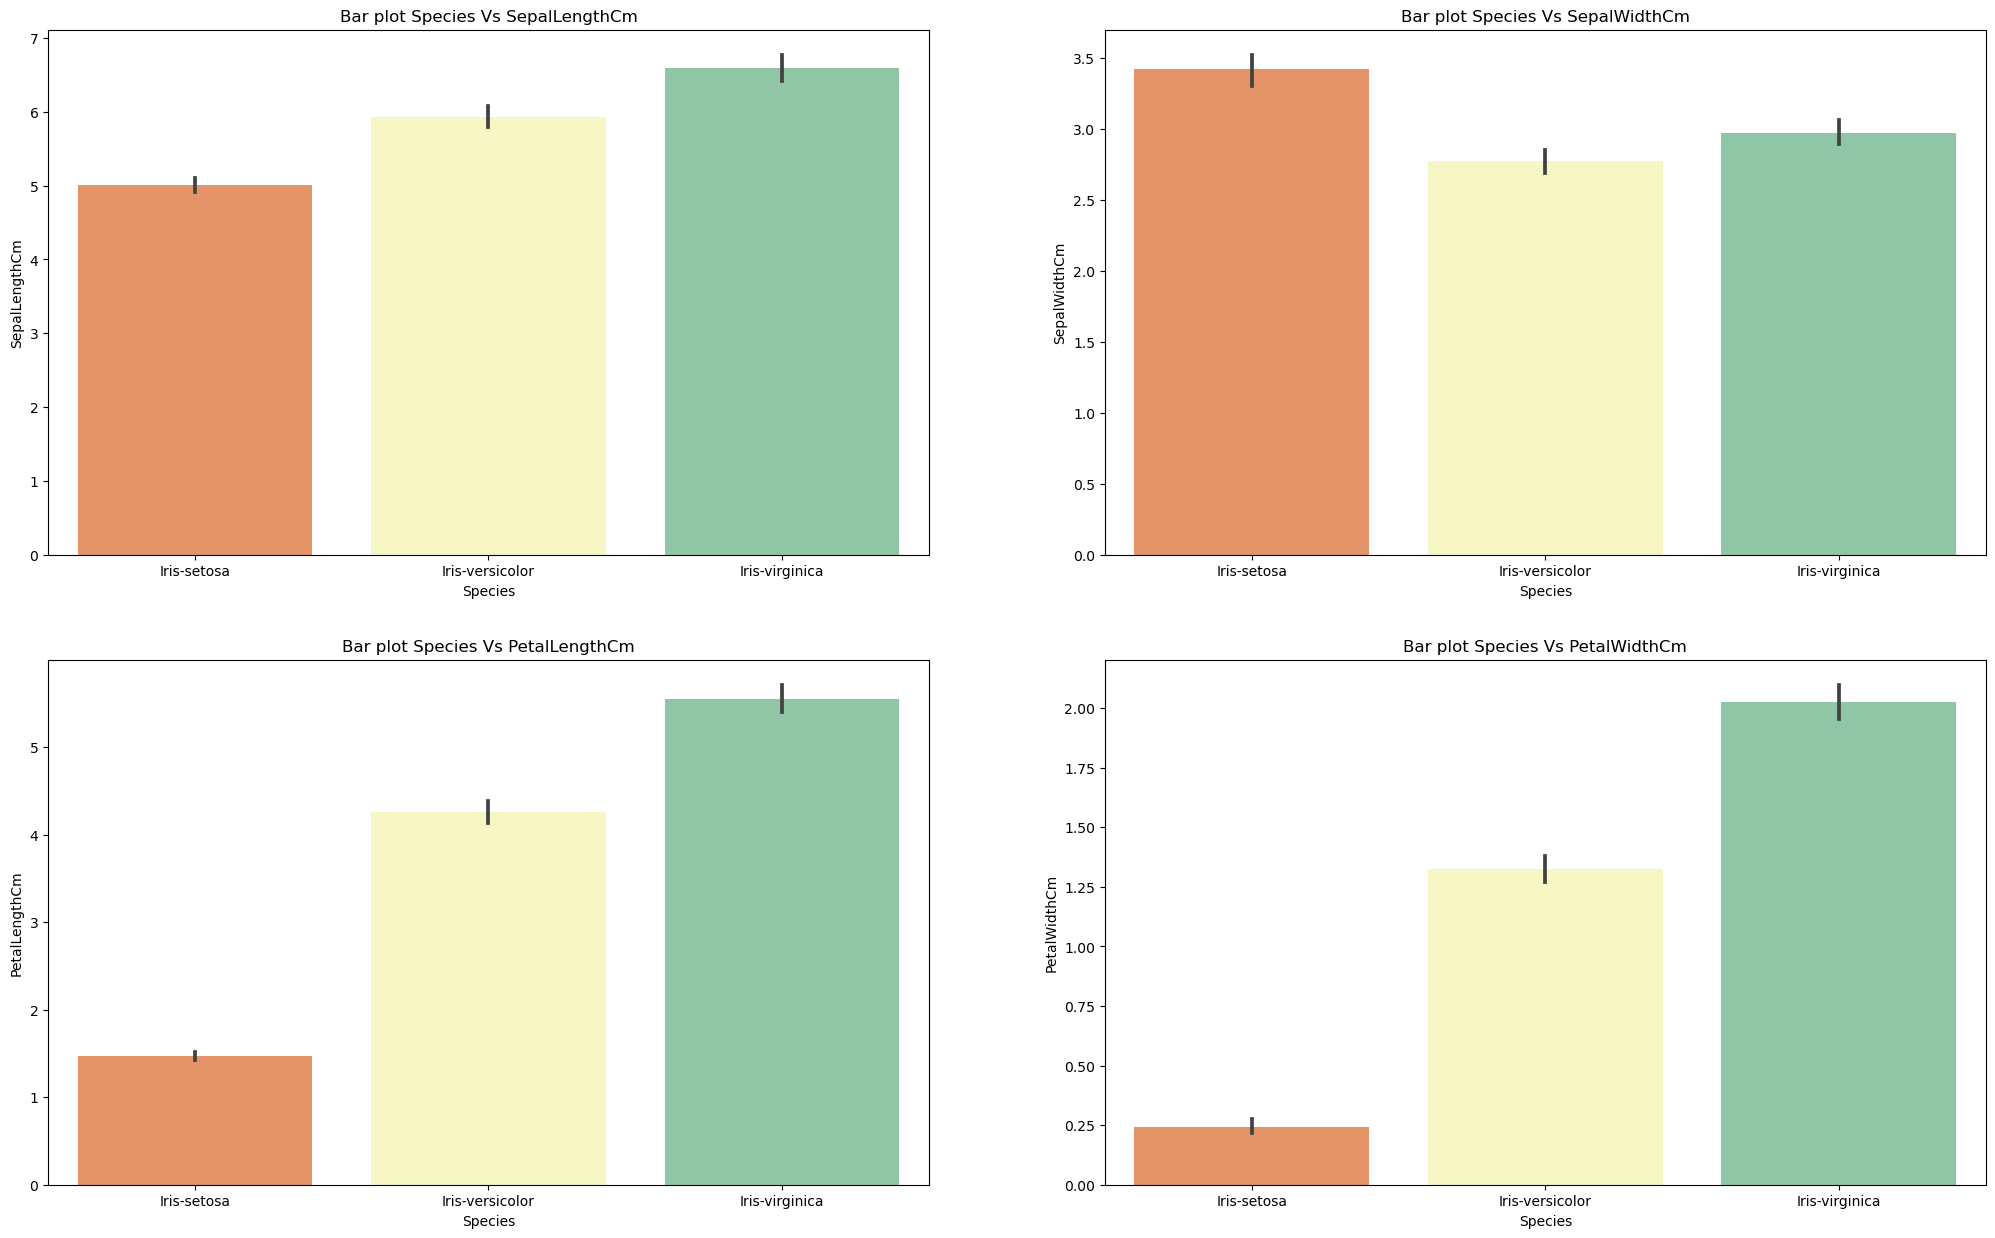

In [15]:
#Barplot for Species Vs Each DataColumns
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.barplot(data=a,x="Species",y="SepalLengthCm",palette=("Spectral"))
plt.title("Bar plot Species Vs SepalLengthCm")

plt.subplot(2,2,2)
sns.barplot(data=a,x="Species",y="SepalWidthCm",palette=("Spectral"))
plt.title("Bar plot Species Vs SepalWidthCm")

plt.subplot(2,2,3)
sns.barplot(data=a,x="Species",y="PetalLengthCm",palette=("Spectral"))
plt.title("Bar plot Species Vs PetalLengthCm")

plt.subplot(2,2,4)
sns.barplot(data=a,x="Species",y="PetalWidthCm",palette=("Spectral"))
plt.title("Bar plot Species Vs PetalWidthCm")

Text(0.5, 1.0, 'Box plot Species Vs PetalWidthCm')

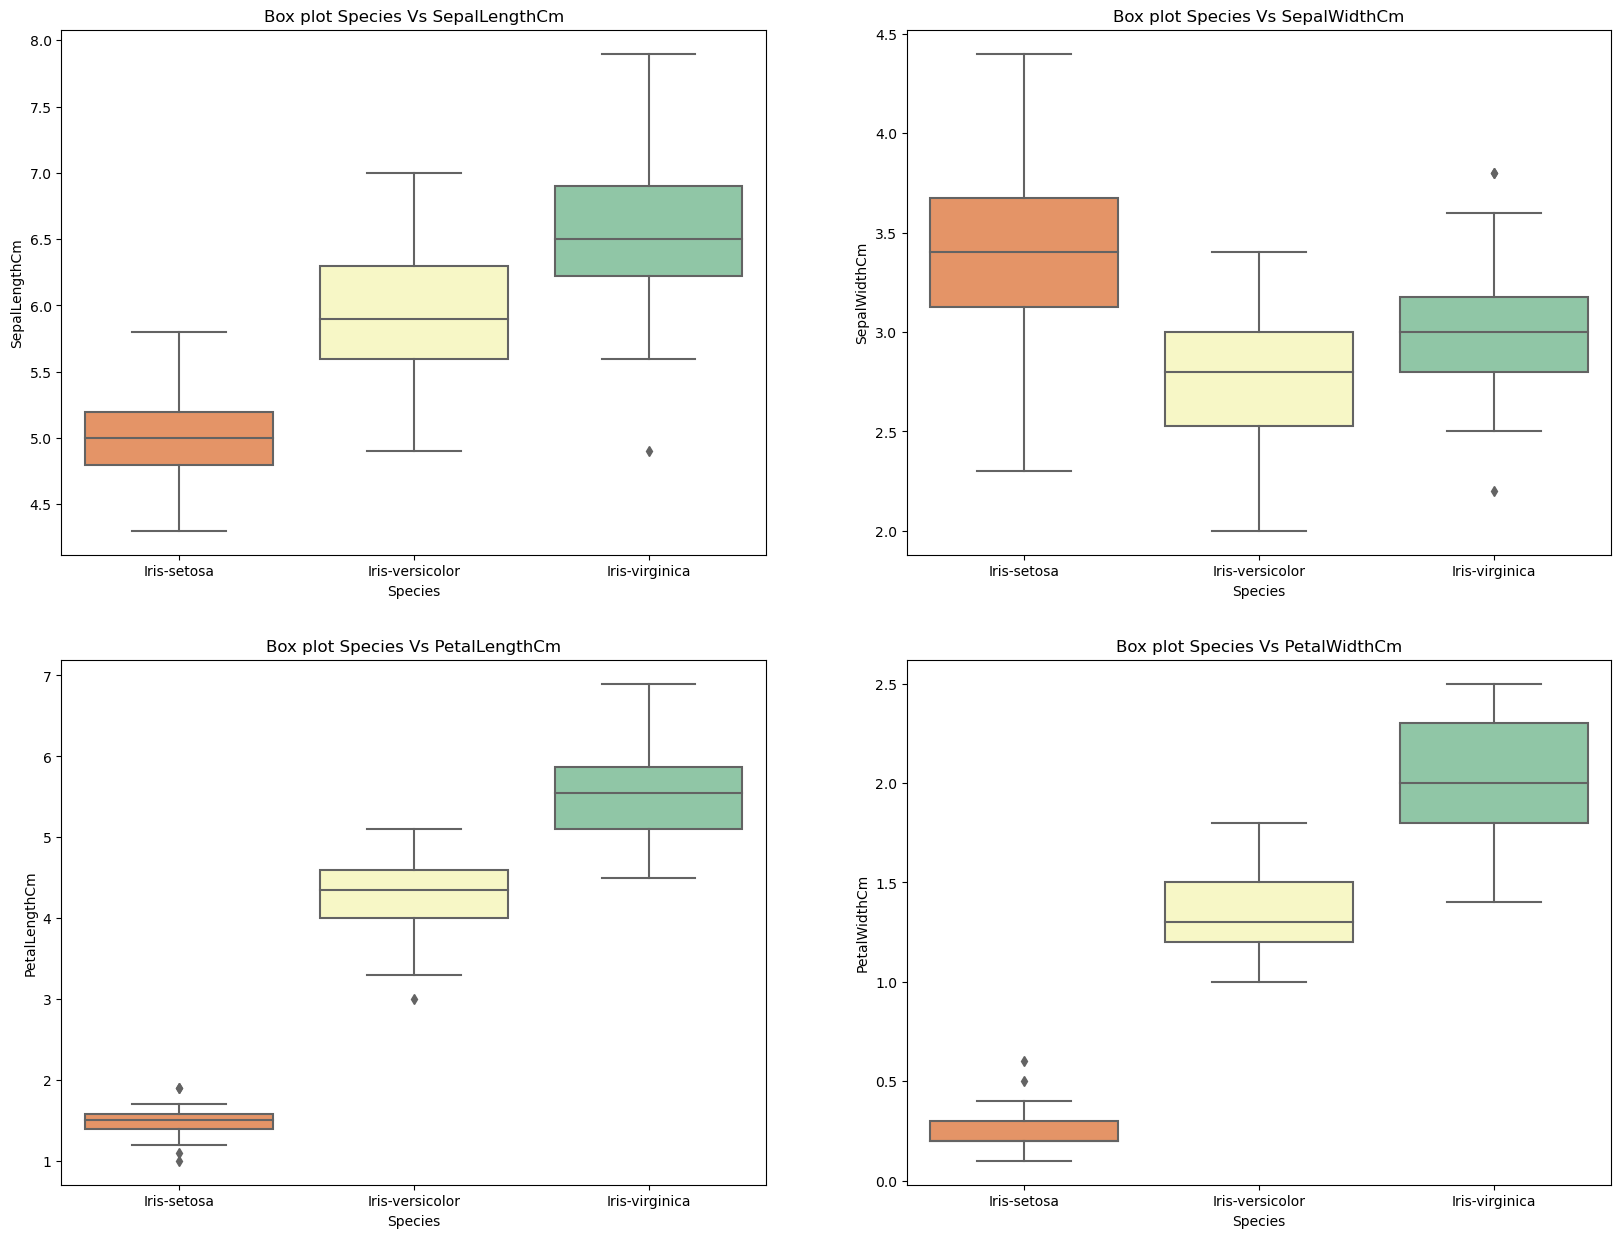

In [16]:
#Boxplot for Species Vs Each DataColumns
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(data=a,x="Species",y="SepalLengthCm",palette=("Spectral"))
plt.title("Box plot Species Vs SepalLengthCm")

plt.subplot(2,2,2)
sns.boxplot(data=a,x="Species",y="SepalWidthCm",palette=("Spectral"))
plt.title("Box plot Species Vs SepalWidthCm")

plt.subplot(2,2,3)
sns.boxplot(data=a,x="Species",y="PetalLengthCm",palette=("Spectral"))
plt.title("Box plot Species Vs PetalLengthCm")

plt.subplot(2,2,4)
sns.boxplot(data=a,x="Species",y="PetalWidthCm",palette=("Spectral"))
plt.title("Box plot Species Vs PetalWidthCm")

C:\Users\haris\AppData\Local\Temp\ipykernel_12804\2316199458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a["SepalLengthCm"],color="b").set_title("Sepal Length interval")
C:\Users\haris\AppData\Local\Temp\ipykernel_12804\2316199458.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a["Se

Text(0.5, 1.0, 'Petal Length interval')

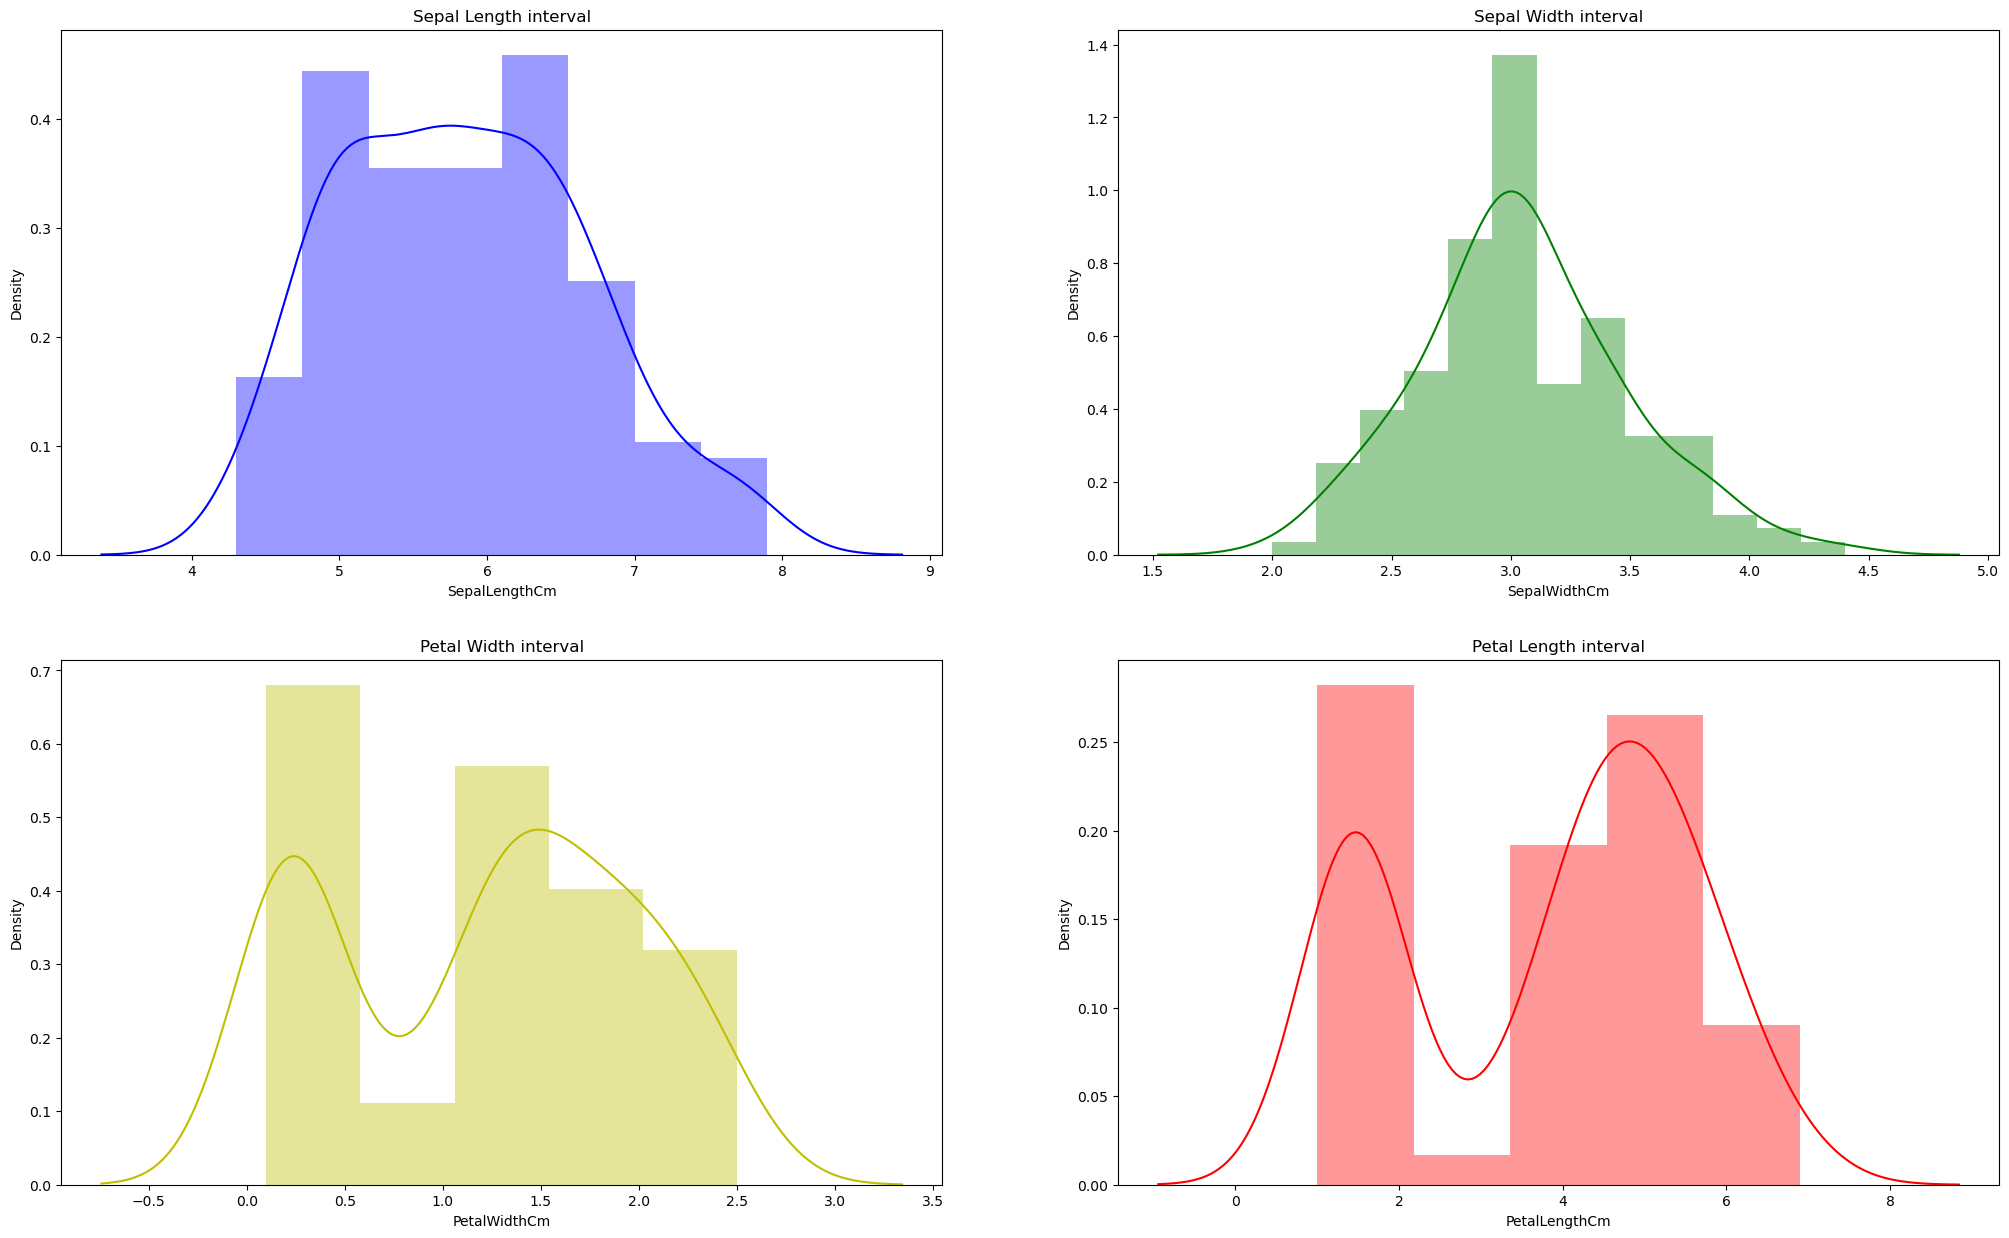

In [17]:
#Distplot for Species Vs Each DataColumns
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.distplot(a["SepalLengthCm"],color="b").set_title("Sepal Length interval")

plt.subplot(2,2,2)
sns.distplot(a["SepalWidthCm"],color="g").set_title("Sepal Width interval")

plt.subplot(2,2,3)
sns.distplot(a["PetalWidthCm"],color="y").set_title("Petal Width interval")

plt.subplot(2,2,4)
sns.distplot(a["PetalLengthCm"],color="r").set_title("Petal Length interval")


C:\Users\haris\AppData\Local\Temp\ipykernel_12804\1639059650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr())


<Axes: >

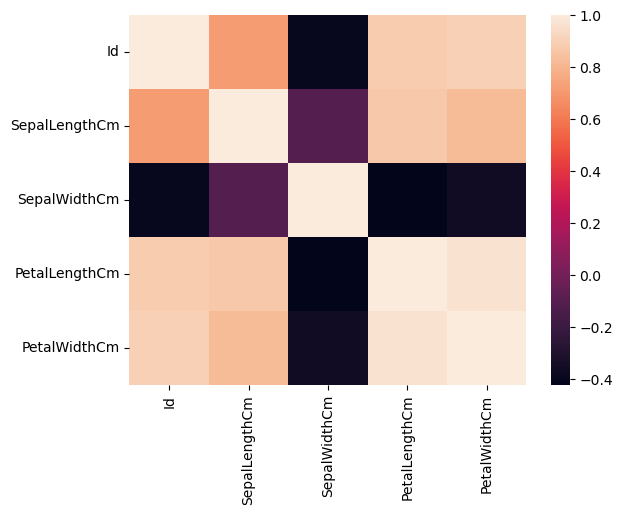

In [18]:
#HeatMap for the Dataset
sns.heatmap(a.corr())

# Data Prepation

In [19]:
#Removing Id from Dataset
a.drop('Id',axis=1,inplace=True)
#Renaming the Species and grouping it
c={'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
a.Species=[c[i] for i in a.Species]
a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.5,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [20]:
m=a.iloc[:,0:4]
m

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.5,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
n=a.iloc[:,4]
n

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

# Training the Module

In [22]:
x_train,x_test,y_train,y_test = train_test_split(m,n,test_size=0.33,random_state=42)

In [23]:
model=LinearRegression()

In [24]:
model.fit(m,n)

LinearRegression()

In [25]:
#Coef of prediction
model.score(m,n)

0.9304548902785754

In [26]:
model.coef_

array([-0.1101666 , -0.04410523,  0.22753577,  0.60937119])

In [27]:
model.intercept_

1.1926218031161309

# Prediction

In [28]:
pred= model.predict(x_test)
pred

array([2.19777445, 0.96669447, 3.20121593, 2.34168478, 2.26528564,
       1.03281651, 2.05909499, 2.85773221, 2.35052512, 2.05320633,
       2.71457697, 0.91099363, 0.85000793, 0.91832002, 0.98728728,
       2.39743699, 3.0045473 , 2.02312358, 2.25727105, 2.97887785,
       1.01963351, 2.60008327, 1.09963672, 2.91794073, 2.8296771 ,
       2.90692963, 2.76081812, 3.04636697, 1.03286786, 1.01302738,
       0.87648662, 0.9556613 , 2.17205642, 0.99979581, 0.98442276,
       2.68379326, 2.28438657, 0.92856507, 0.92343429, 0.84116481,
       2.75280909, 2.38056929, 2.30125427, 0.96525674, 0.8977107 ,
       1.93210649, 2.44956679, 2.69914423, 2.1874836 , 3.15203963])

# Model Evaluation

In [29]:
print("Mean Squared Error: %.2f" % np.mean((pred - y_test)**2))

Mean Squared Error: 0.04
